# **Feature Engineering: Using LDA Mallet**

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. Its the process of using domain knowledge of the data to create features that make machine learning algorithms work. By creating features from raw data that help facilitate the machine learning process

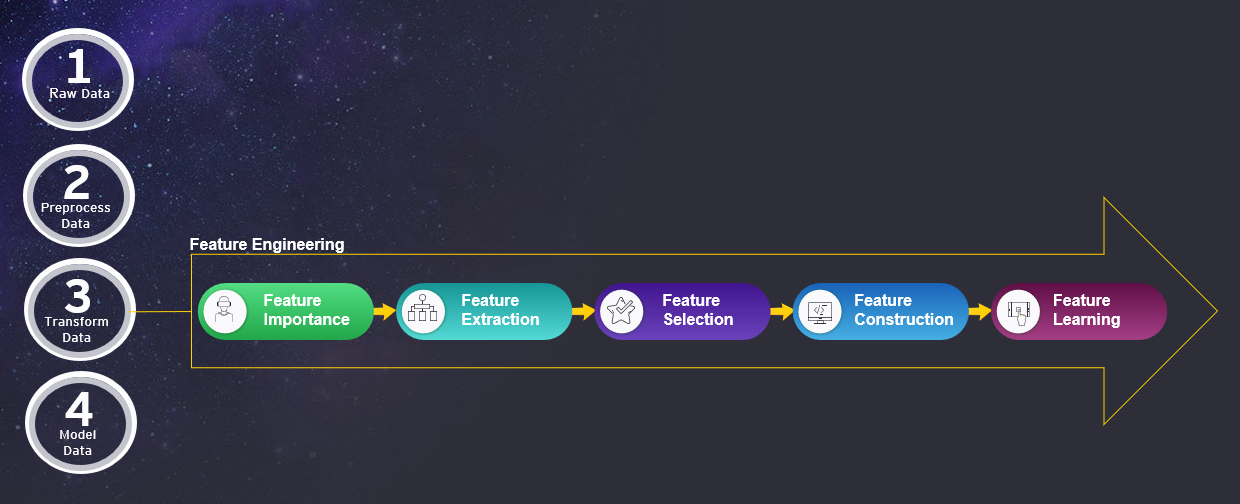



*   *Feature Importance:* An estimate of the usefulness of a feature
*   *Feature Extraction:* The automatic construction of new features from raw data

*   *Feature Selection:* From many features to a few that are useful
*   *Feature Construction:* The manual construction of new features from raw data

*   *Feature Learning:* The automatic identification and use of features in raw data








**Import Libraries**

In [1]:
!pip install wordcloud

You should consider upgrading via the 'd:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install gensim

You should consider upgrading via the 'd:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install -U spacy

Requirement already up-to-date: spacy in d:\anaconda3\lib\site-packages (2.3.1)


You should consider upgrading via the 'd:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install pyldavis

You should consider upgrading via the 'd:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [5]:
!pip install adjustText

You should consider upgrading via the 'd:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [6]:
import numpy as np 
import pandas as pd
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
import pyLDAvis.sklearn
from adjustText import adjust_text
from pickle import dump 
from pickle import load
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import nltk
nltk.download('punkt')

import spacy

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Run in python console
import nltk; nltk.download('stopwords')

Using TensorFlow backend.


Loading BokehJS ...

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
d:\Anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
import pickle
infile = open('D:\greatlearning\Deep Learning\capstone\AugmentedDataframe_0627.pkl','rb')
CleandataDataframe = pickle.load(infile)
infile.close()

<>:2: DeprecationWarning: invalid escape sequence \g
<>:2: DeprecationWarning: invalid escape sequence \g
<>:2: DeprecationWarning: invalid escape sequence \g
<ipython-input-8-b4d500e7fc4e>:2: DeprecationWarning: invalid escape sequence \g
  infile = open('D:\greatlearning\Deep Learning\capstone\AugmentedDataframe_0627.pkl','rb')


In [9]:
CleandataDataframe.head(5)

,index,Short description,Description,Caller,Assignment group,short_desc_len,short_des_word_count,Desc_len,Des_word_count,word_count,...,Clean Short Description_1,Clean Description_1,Clean_Shrt_Desc_SWR,Clean_Desc_SWR,Clean_Shrt_Desc_lem,Clean_Desc_lem,SD_translated,D_translated,Assignment_Group_Updated,Description_updated
800,2599.0,call conference to nahytu,call conference to nahytu,oxlqvikazrvbahym,GRP_0,25.0,4.0,25.0,4.0,4.0,...,call conference to nahytu,call conference to nahytu,call conference nahytu,call conference nahytu,call conference nahytu,call conference nahytu,call conference nahytu,call conference nahytu,GRP_0,call conference nahytu call conference nahytu
801,7862.0,mobile device activation,mobile device activation,aqritplubeuflorc,GRP_0,24.0,3.0,24.0,3.0,3.0,...,mobile device activation,mobile device activation,mobile device activation,mobile device activation,mobile device activation,mobile device activation,mobile device activation,mobile device activation,GRP_0,mobile device activation mobile device activation
802,7863.0,unable to install engineering_tool,unable to install engineering_tool,anpoceztqturbxsg,GRP_0,34.0,4.0,34.0,4.0,5.0,...,unable to install engineering tool,unable to install engineering tool,unable install engineering tool,unable install engineering tool,unable install engineering tool,unable install engineering tool,unable install engineering tool,unable install engineering tool,GRP_0,unable install engineering tool unable install...
803,7864.0,password reset for bsopzxhi irfhcgzq,password reset for bsopzxhi irfhcgzq,wvngzrcasfmrzdth,GRP_0,36.0,5.0,36.0,5.0,5.0,...,password reset for bsopzxhi irfhcgzq,password reset for bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,GRP_0,password reset bsopzxhi irfhcgzq password rese...
804,7865.0,password,\r\n\r\nreceived from: xzjlkfvc.agfmpyhr@gmail...,xzjlkfvcagfmpyhr,GRP_0,8.0,1.0,122.0,14.0,16.0,...,password,from hi please reset my password and sending t...,password,hi reset password sending password log well,password,hi reset password sending password log well,password,hi reset password sending password log well,GRP_0,password hi reset password sending password lo...


In [10]:
#CleandataDataframe["Combined_Description"] = CleandataDataframe['SpellCorrected_Short_Desc'].astype(str) +" "+ CleandataDataframe['SpellCorrected_Desc'].astype(str)
CleandataDataframe["Description_updated"].head(5)

800        call conference nahytu call conference nahytu
801    mobile device activation mobile device activation
802    unable install engineering tool unable install...
803    password reset bsopzxhi irfhcgzq password rese...
804    password hi reset password sending password lo...
Name: Description_updated, dtype: object

In [11]:
CleandataDataframe.shape

(45600, 32)

## Derive a separate column 'Urgency' based on the occurrence of following words

In [12]:
urgency_list = ['urgent', 'as soon as possible','priority','immediate','asap','high priority'] 

In [13]:
arr =[]
for ind in CleandataDataframe.index:
    row_val = CleandataDataframe['Description_updated'][ind]
    #print(row_val)
    res = [ele for ele in urgency_list if(ele in row_val)] 
    arr.append(str(bool(res)))
CleandataDataframe.insert(32, "Urgency", arr, True) 

In [14]:
CleandataDataframe.head(5)

,index,Short description,Description,Caller,Assignment group,short_desc_len,short_des_word_count,Desc_len,Des_word_count,word_count,...,Clean Description_1,Clean_Shrt_Desc_SWR,Clean_Desc_SWR,Clean_Shrt_Desc_lem,Clean_Desc_lem,SD_translated,D_translated,Assignment_Group_Updated,Description_updated,Urgency
800,2599.0,call conference to nahytu,call conference to nahytu,oxlqvikazrvbahym,GRP_0,25.0,4.0,25.0,4.0,4.0,...,call conference to nahytu,call conference nahytu,call conference nahytu,call conference nahytu,call conference nahytu,call conference nahytu,call conference nahytu,GRP_0,call conference nahytu call conference nahytu,False
801,7862.0,mobile device activation,mobile device activation,aqritplubeuflorc,GRP_0,24.0,3.0,24.0,3.0,3.0,...,mobile device activation,mobile device activation,mobile device activation,mobile device activation,mobile device activation,mobile device activation,mobile device activation,GRP_0,mobile device activation mobile device activation,False
802,7863.0,unable to install engineering_tool,unable to install engineering_tool,anpoceztqturbxsg,GRP_0,34.0,4.0,34.0,4.0,5.0,...,unable to install engineering tool,unable install engineering tool,unable install engineering tool,unable install engineering tool,unable install engineering tool,unable install engineering tool,unable install engineering tool,GRP_0,unable install engineering tool unable install...,False
803,7864.0,password reset for bsopzxhi irfhcgzq,password reset for bsopzxhi irfhcgzq,wvngzrcasfmrzdth,GRP_0,36.0,5.0,36.0,5.0,5.0,...,password reset for bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,GRP_0,password reset bsopzxhi irfhcgzq password rese...,False
804,7865.0,password,\r\n\r\nreceived from: xzjlkfvc.agfmpyhr@gmail...,xzjlkfvcagfmpyhr,GRP_0,8.0,1.0,122.0,14.0,16.0,...,from hi please reset my password and sending t...,password,hi reset password sending password log well,password,hi reset password sending password log well,password,hi reset password sending password log well,GRP_0,password hi reset password sending password lo...,False


# Prepare Stopwords

In [15]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Tokenize words and Clean-up text

In [16]:
data = CleandataDataframe["Description_updated"]

In [17]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['call', 'conference', 'nahytu', 'call', 'conference', 'nahytu']]


# Creating Bigram and Trigram Models

###### Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring. Gensim’s Phrases model can build and implement the bigrams, trigrams, quadgrams and more. The two important arguments to Phrases are min_count and threshold. The higher the values of these param, the harder it is for words to be combined to bigrams.

In [18]:
# Build the bigram and trigram models

 # higher threshold fewer phrases.reduced threshold from 100 to 10 but there is no change in output
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10)
trigram = gensim.models.Phrases(bigram[data_words], threshold=10)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[4]]])

['password', 'hi', 'reset', 'password', 'sending', 'password', 'log', 'well']


# Remove Stopwords, Make Bigrams and Lemmatize

##### The bigrams model is ready. Let’s define the functions to remove the stopwords, make bigrams and lemmatization and call them sequentially.

In [19]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [20]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[[]]


In [21]:
print(data_lemmatized[1])

['device_activation']


# Create the Dictionary and Corpus needed for Topic Modeling

##### The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.

In [23]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[]]


In [24]:
print(corpus[1])

[(0, 1)]


##### Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).

##### This is used as the input by the LDA model.

##### If you want to see what word a given id corresponds to, pass the id as a key to the dictionary.

In [25]:
id2word[1]

'engineering'

In [26]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:3]]

[[],
 [('device_activation', 1)],
 [('engineering', 2), ('install', 2), ('tool', 2), ('unable', 2)]]

# Building the Topic Model

##### We have everything required to train the LDA model. In addition to the corpus and dictionary, 
##### you need to provide the number of topics as well.
##### Apart from that, alpha and other hyperparameters that affect sparsity of the topics. 
##### According to the Gensim docs, both defaults to 1.0/num_topics prior.

##### chunksize is the number of documents to be used in each training chunk. 
##### update_every determines how often the model parameters should be updated and passes is the total number of training passes.

In [27]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# View the topics in LDA model

##### The above LDA model is built with 20 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic.

##### We can see the keywords for each topic and the weightage(importance) of each keyword using lda_model.print_topics() as shown next.

In [28]:
# Print the Keyword in the 10 topics
#print(lda_model.print_topics())
#print(lda_model.print_topics(num_topics=-1, num_words=10))
print(lda_model.print_topics(num_topics=10, num_words=10))
doc_lda = lda_model[corpus]

[(0, '0.282*"source" + 0.094*"d" + 0.094*"information" + 0.067*"can" + 0.056*"make_receive" + 0.048*"datum" + 0.047*"type" + 0.047*"local" + 0.042*"server" + 0.033*"accord"'), (1, '0.665*"device" + 0.058*"fail" + 0.051*"lease_duration" + 0.051*"renew" + 0.030*"long" + 0.017*"ping" + 0.017*"admin_datacenter" + 0.008*"make" + 0.008*"call" + 0.008*"lock"'), (2, '0.128*"job" + 0.077*"come" + 0.076*"slow" + 0.076*"impact" + 0.068*"plant" + 0.052*"create" + 0.045*"erp" + 0.038*"quick" + 0.038*"schedule" + 0.028*"page"'), (3, '0.319*"renew" + 0.319*"lease_duration" + 0.068*"address" + 0.023*"sep" + 0.023*"connection" + 0.023*"destination" + 0.023*"action_blocke" + 0.023*"related_event" + 0.023*"count_host" + 0.023*"security_incident"'), (4, '0.386*"user" + 0.138*"provide" + 0.094*"require" + 0.084*"dynamic" + 0.053*"check" + 0.046*"issue" + 0.025*"analytic" + 0.022*"problem" + 0.017*"document" + 0.013*"qs_testimonial"'), (5, '0.216*"name" + 0.206*"port" + 0.137*"log" + 0.080*"office" + 0.055*

###### How to interpret this?

###### Topic 1 is a represented as 0.665*"device" + 0.058*"fail" + 0.051*"lease_duration" + 0.051*"renew" + 0.030*"long" + 0.017*"ping" + 0.017*"admin_datacenter" + 0.008*"make" + 0.008*"call" + 0.008*"lock"'

###### It means the top 10 keywords that contribute to this topic are: ‘device’, ‘fail’, ‘lease_duration.. and so on and the weight of ‘device’ on topic 0 is 0.665.

###### The weights reflect how important a keyword is to that topic.

###### Looking at these keywords, We may summarise it as ‘printing’.

# Compute Model Perplexity and Coherence Score

##### Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. 


In [29]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.33583339908856

Coherence Score:  0.46706917672388676


# Visualize the topics-keywords

##### Now that the LDA model is built, the next step is to examine the produced topics and the associated keywords. There is no better tool than pyLDAvis package’s interactive chart and is designed to work well with jupyter notebooks.

In [30]:
# Visualize the topics
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

d:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.022991 -0.314920       1        1  20.373566
0     -0.077976 -0.006097       2        1  15.725164
5      0.036104 -0.060832       3        1  12.647957
2     -0.135060  0.091331       4        1  12.423992
4     -0.093360  0.063048       5        1   8.673498
3      0.352281  0.028636       6        1   8.370872
9     -0.161972  0.179101       7        1   7.289121
7     -0.085358 -0.257007       8        1   6.153768
1      0.310336  0.100498       9        1   5.096194
6     -0.122003  0.176243      10        1   3.245872, topic_info=     Category          Freq                   Term         Total  loglift  \
47    Default  43127.000000                 access  43127.000000  30.0000   
41    Default  17244.000000                 device  17244.000000  29.0000   
981   Default  22561.000000                 source  22561.000000  28.0000   
15    Default  17057.000000                   user  17057.000000  27.0000   
63    Default  14357.000000                company  14357.000000  26.0000   
1465  Default  15676.000000                  renew  15676.000000  25.0000   
7119  Default  15677.000000         lease_duration  15677.000000  24.0000   
37    Default  13909.000000                   name  13909.000000  23.0000   
347   Default  13258.000000                   port  13258.000000  22.0000   
1233  Default  15980.000000                  event  15980.000000  21.0000   
3     Default  14941.000000                   tool  14941.000000  20.0000   
1066  Default   7439.000000                  agent   7439.000000  19.0000   
91    Default   8835.000000                    log   8835.000000  18.0000   
4     Default   4982.000000                 unable   4982.000000  17.0000   
976   Default   8091.000000                    job   8091.000000  16.0000   
525   Default   6095.000000                provide   6095.000000  15.0000   
10    Default   7542.000000                      d   7542.000000  14.0000   
307   Default   7531.000000            information   7531.000000  13.0000   
462   Default   4996.000000                  would   4996.000000  12.0000   
2891  Default   4421.000000        users_currently   4421.000000  11.0000   
1060  Default   4421.000000         receiving_mail   4421.000000  10.0000   
7114  Default   4421.000000         note_currently   4421.000000   9.0000   
432   Default   5154.000000                 office   5154.000000   8.0000   
244   Default   4159.000000                require   4159.000000   7.0000   
670   Default   4865.000000                   come   4865.000000   6.0000   
199   Default   4827.000000                   slow   4827.000000   5.0000   
622   Default   4794.000000                 impact   4794.000000   4.0000   
273   Default   2933.000000                  thank   2933.000000   3.0000   
62    Default   3551.000000                    com   3551.000000   2.0000   
85    Default   5335.000000                    can   5335.000000   1.0000   
...       ...           ...                    ...           ...      ...   
7053  Topic10    163.987091             docked_sye    165.038284   3.4214   
7054  Topic10    163.987091               syed_sye    165.038284   3.4214   
344   Topic10    125.322487                  alert    126.350311   3.4196   
273   Topic10   2904.704590                  thank   2933.529785   3.4179   
660   Topic10     59.889400            connect_vpn     60.922123   3.4107   
7044  Topic10    110.268654     credential_usually    112.621544   3.4067   
7046  Topic10    110.268654       romftguald_helpe    112.621544   3.4067   
7045  Topic10    110.268654        download_actual    112.621544   3.4067   
6981  Topic10     51.213287      reports_ticketing     52.850178   3.3963   
453   Topic10     30.082773                 status     31.109798   3.3942   
6284  Topic10     18.720772  tooltion_azurewebsite     19.748051   3.3744  

# Building LDA Mallet Model

##### So far you have seen Gensim’s inbuilt version of the LDA algorithm. Mallet’s version, however, often gives a better quality of topics.

In [31]:
!pip install --upgrade gensim

Requirement already up-to-date: gensim in d:\anaconda3\lib\site-packages (3.8.3)


You should consider upgrading via the 'd:\anaconda3\python.exe -m pip install --upgrade pip' command.


In [32]:
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':'c:/mallet-2.0.8'}) 
#You should update this path as per the path of Mallet directory on your system.
mallet_path = 'c:/mallet-2.0.8/bin/mallet' 

In [33]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
#mallet_path = 'path/to/mallet-2.0.8/bin/mallet' # update this path
#mallet_path = '/content/drive/My Drive/Colab Notebooks/mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

In [34]:
# Show Topics
print(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0, [('job', 0.4390163429602094), ('scheduler', 0.17462551965334447), ('fail', 0.14792248641752634), ('monitoring', 0.08061500560895674), ('monitor', 0.024591425994764975), ('abended', 0.017772694278864132), ('switch', 0.010580032114026791), ('abende', 0.006158854453071729), ('ping', 0.005652948551569408), ('admin_datacenter', 0.004817104018652531)]), (1, [('user', 0.12696170747018204), ('issue', 0.0728410008071025), ('file', 0.0551071652766568), ('system', 0.05113891130840283), ('pc', 0.039077212806026364), ('open', 0.02806923145906197), ('software', 0.025289211729889696), ('follow', 0.023585328670074433), ('attachment', 0.02215047977759842), ('telephony_software', 0.014774459689713927)]), (2, [('email', 0.09846407632805011), ('company', 0.08963641632671258), ('check', 0.04438351278450255), ('team', 0.04322432510755924), ('send', 0.03939008894536213), ('outlook', 0.03749526293497403), ('office', 0.022403531064000535), ('contact', 0.019282641164537775), ('address', 0.01912659666956463

# How to find the optimal number of topics for LDA?

Approach to finding the optimal number of topics is to build many LDA models with different values of number of topics (k) and pick the one that gives the highest coherence value.

Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.

If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

The compute_coherence_values() (see below) trains multiple LDA models and provides the models and their corresponding coherence scores.

In [35]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics, was defaulted to 40, made it 30

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [36]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=15, step=6)

In [37]:
model_list

x value::: range(2, 15, 6)


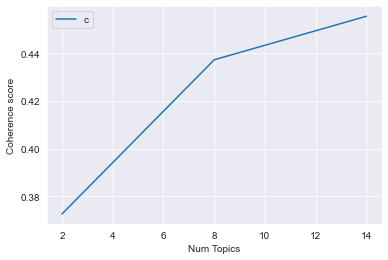

In [38]:
# Show graph, limit was 40, changed it to 30
limit=15; start=2; step=6;
x = range(start, limit, step)
print("x value:::",x)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [39]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3725
Num Topics = 8  has Coherence Value of 0.4373
Num Topics = 14  has Coherence Value of 0.4557


In [40]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=True)
print(optimal_model.print_topics(num_words=10))

[(0, '0.169*"tool" + 0.046*"engineering" + 0.037*"problem" + 0.035*"check" + 0.035*"system" + 0.031*"file" + 0.029*"printer" + 0.026*"print" + 0.024*"team" + 0.020*"provide"'), (1, '0.162*"access" + 0.076*"user" + 0.068*"renew" + 0.068*"lease_duration" + 0.058*"event" + 0.038*"source" + 0.036*"log" + 0.035*"device" + 0.032*"information" + 0.030*"address"'), (2, '0.091*"issue" + 0.052*"account" + 0.043*"number" + 0.033*"contact" + 0.031*"show" + 0.031*"customer" + 0.022*"report" + 0.021*"add" + 0.018*"find" + 0.016*"lock"'), (3, '0.093*"unable" + 0.069*"email" + 0.051*"user" + 0.037*"reset" + 0.031*"pc" + 0.029*"send" + 0.027*"open" + 0.024*"ethic" + 0.018*"screen" + 0.018*"mail"'), (4, '0.105*"error" + 0.063*"order" + 0.049*"message" + 0.035*"change" + 0.033*"update" + 0.026*"create" + 0.026*"production" + 0.025*"attach" + 0.024*"delivery" + 0.018*"customer"'), (5, '0.106*"company" + 0.081*"ticket" + 0.050*"phone" + 0.032*"call" + 0.030*"network" + 0.029*"server" + 0.019*"site" + 0.017

## Finding the dominant topic in each sentence

##### One of the practical application of topic modeling is to determine what topic a given document is about.

##### To find that, we find the topic number that has the highest percentage contribution in that document.

##### The format_topics_sentences() function below nicely aggregates this information in a presentable table.

In [41]:

def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    contents = pd.Series(texts)
    contents.reset_index(drop=True, inplace=True)
    CleandataDataframe.reset_index(drop=True, inplace=True)
    #contents.reset_index()
    #print("text[0]::",contents[24010+i),
    #print("text[1]::",contents)
    sent_topics_df = pd.DataFrame()
    #    contents = pd.Series(texts)
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                               
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
                
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    #contents = pd.Series(texts)
    #print("contents::",contents)
    #print("contents.shape::",contents.shape)
    #print("sent_topics_df.shape::",sent_topics_df.shape)
    #print("sent_topics_df before::",sent_topics_df)
    #sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df = pd.concat([CleandataDataframe,sent_topics_df], axis=1)
    print("sent_topics_df after.shape::",sent_topics_df.shape)
    #print("sent_topics_df after::",sent_topics_df)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)
#df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
#CleandataDataframe = df_topic_sents_keywords.reset_index()
#CleandataDataframe_concatenated = pd.concat([sent_topics_df, CleandataDataframe], axis=1)
#df_dominant_topic.columns = ['Document_No','Text','Dominant_Topic','Topic_Perc_Contrib','Keywords']
#CleandataDataframe.columns = ['Document_No','Text','Dominant_Topic','Topic_Perc_Contrib','Keywords']

# Show
df_dominant_topic.head(5)
#CleandataDataframe.head(40)

sent_topics_df after.shape:: (45600, 36)


,level_0,index,Short description,Description,Caller,Assignment group,short_desc_len,short_des_word_count,Desc_len,Des_word_count,...,Clean_Shrt_Desc_lem,Clean_Desc_lem,SD_translated,D_translated,Assignment_Group_Updated,Description_updated,Urgency,Dominant_Topic,Perc_Contribution,Topic_Keywords
0,0,2599.0,call conference to nahytu,call conference to nahytu,oxlqvikazrvbahym,GRP_0,25.0,4.0,25.0,4.0,...,call conference nahytu,call conference nahytu,call conference nahytu,call conference nahytu,GRP_0,call conference nahytu call conference nahytu,False,0.0,0.1250,"tool, engineering, problem, check, system, fil..."
1,1,7862.0,mobile device activation,mobile device activation,aqritplubeuflorc,GRP_0,24.0,3.0,24.0,3.0,...,mobile device activation,mobile device activation,mobile device activation,mobile device activation,GRP_0,mobile device activation mobile device activation,False,2.0,0.1422,"issue, account, number, contact, show, custome..."
2,2,7863.0,unable to install engineering_tool,unable to install engineering_tool,anpoceztqturbxsg,GRP_0,34.0,4.0,34.0,4.0,...,unable install engineering tool,unable install engineering tool,unable install engineering tool,unable install engineering tool,GRP_0,unable install engineering tool unable install...,False,0.0,0.1767,"tool, engineering, problem, check, system, fil..."
3,3,7864.0,password reset for bsopzxhi irfhcgzq,password reset for bsopzxhi irfhcgzq,wvngzrcasfmrzdth,GRP_0,36.0,5.0,36.0,5.0,...,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,password reset bsopzxhi irfhcgzq,GRP_0,password reset bsopzxhi irfhcgzq password rese...,False,0.0,0.1250,"tool, engineering, problem, check, system, fil..."
4,4,7865.0,password,\r\n\r\nreceived from: xzjlkfvc.agfmpyhr@gmail...,xzjlkfvcagfmpyhr,GRP_0,8.0,1.0,122.0,14.0,...,password,hi reset password sending password log well,password,hi reset password sending password log well,GRP_0,password hi reset password sending password lo...,False,3.0,0.1422,"unable, email, user, reset, pc, send, open, et..."


In [42]:
df_final_for_modelling = df_dominant_topic[['Description_updated','Assignment_Group_Updated','Dominant_Topic','Perc_Contribution','Topic_Keywords']]

#### Topic to Functional Group Name Mapping 

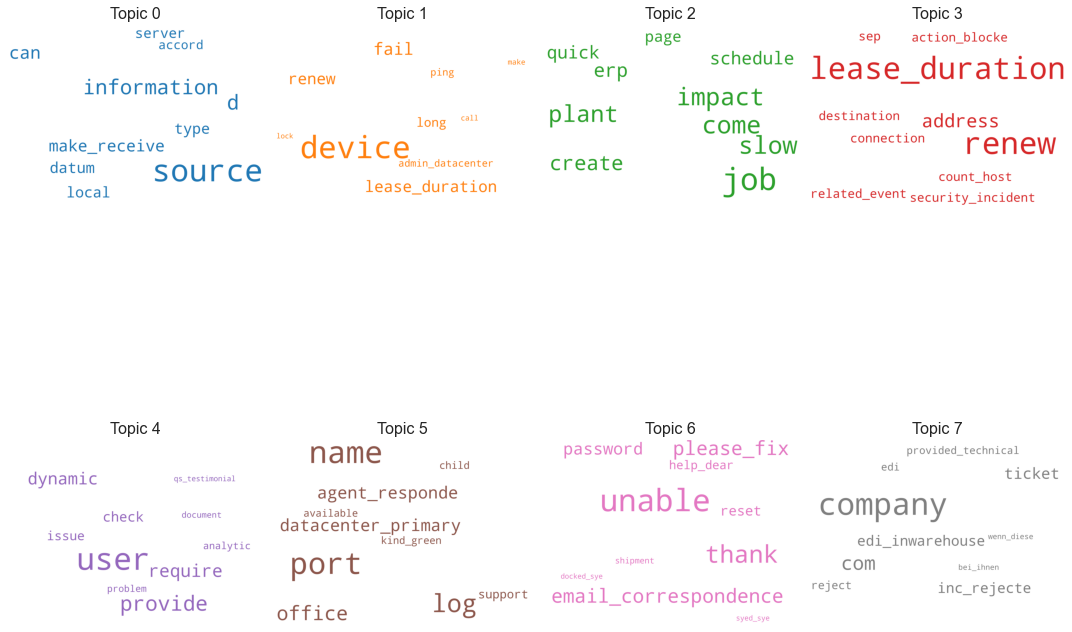

In [43]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 4, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

#### Based on the keywords, we can assign each Topic a Functional Group Name, and it will be as follows

In [44]:
df_final_for_modelling['Dominant_Topic'] = df_final_for_modelling['Dominant_Topic'].astype(str).replace({'0.0': 'Local Source Info', '1.0': 'Infrastructure', '2.0': 'Job', '3.0': 'Security','4.0': 'User Maintenance','5.0': 'Network','6.0': 'Password Maintenance','7.0': 'Database'})

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
#Topic to Sentence Mapping
df_final_for_modelling['Dominant_Topic'].value_counts()

Security                8131
Local Source Info       8097
Job                     6380
Database                5688
Password Maintenance    5489
User Maintenance        5045
Network                 4802
Infrastructure          1968
Name: Dominant_Topic, dtype: int64

In [46]:
#Unique Topic 
df_final_for_modelling[['Dominant_Topic','Topic_Keywords']]

,Dominant_Topic,Topic_Keywords
0,Local Source Info,"tool, engineering, problem, check, system, fil..."
1,Job,"issue, account, number, contact, show, custome..."
2,Local Source Info,"tool, engineering, problem, check, system, fil..."
3,Local Source Info,"tool, engineering, problem, check, system, fil..."
4,Security,"unable, email, user, reset, pc, send, open, et..."
5,Network,"company, ticket, phone, call, network, server,..."
6,User Maintenance,"error, order, message, change, update, create,..."
7,User Maintenance,"error, order, message, change, update, create,..."
8,Job,"issue, account, number, contact, show, custome..."
9,Database,"work, plant, cid, outlook, server, sale, creat..."


In [47]:
#Unique Topic 
df_final_for_modelling['Dominant_Topic'][4]

'Security'

In [48]:
df_final_for_modelling[:7620]

,Description_updated,Assignment_Group_Updated,Dominant_Topic,Perc_Contribution,Topic_Keywords
0,call conference nahytu call conference nahytu,GRP_0,Local Source Info,0.1250,"tool, engineering, problem, check, system, fil..."
1,mobile device activation mobile device activation,GRP_0,Job,0.1422,"issue, account, number, contact, show, custome..."
2,unable install engineering tool unable install...,GRP_0,Local Source Info,0.1767,"tool, engineering, problem, check, system, fil..."
3,password reset bsopzxhi irfhcgzq password rese...,GRP_0,Local Source Info,0.1250,"tool, engineering, problem, check, system, fil..."
4,password hi reset password sending password lo...,GRP_0,Security,0.1422,"unable, email, user, reset, pc, send, open, et..."
5,unlock account email cell phone user michthey ...,GRP_0,Network,0.1735,"company, ticket, phone, call, network, server,..."
6,engineering tool erp system message users repo...,GRP_0,User Maintenance,0.1856,"error, order, message, change, update, create,..."
7,reset password dqowbefk prgxwzco erp productio...,GRP_0,User Maintenance,0.1394,"error, order, message, change, update, create,..."
8,system login issue login issue verified user d...,GRP_0,Job,0.2142,"issue, account, number, contact, show, custome..."
9,audio device audio device pc failed play uacyl...,GRP_0,Database,0.1568,"work, plant, cid, outlook, server, sale, creat..."


In [47]:
df_final_for_modelling.to_pickle("./df_topicfinal.pkl")

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report

In [50]:
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(df_final_for_modelling['Description_updated'])
print(x_train_counts.shape)
#print(count_vect.vocabulary_)

(45600, 13339)


In [51]:
X=df_final_for_modelling['Description_updated'] + ' ' + df_final_for_modelling['Dominant_Topic']
y=df_final_for_modelling['Assignment_Group_Updated']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
print(x_train_tfidf.shape)

(45600, 13339)


In [53]:
train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, y, test_size=0.3)

In [54]:
train_x.shape

(31920, 13339)

In [55]:
train_y.shape

(31920,)

In [56]:
test_x.shape

(13680, 13339)

In [57]:
test_y.shape

(13680,)

In [58]:
compare_results = pd.DataFrame(columns=['Algorithm Name', 'Accuracy', 'F1 Score'])

### Random Forests

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=150, random_state=100, bootstrap=False)
rfcl = rfcl.fit(train_x, train_y)
pred_RF = rfcl.predict(test_x)
acc_RF = accuracy_score(test_y, pred_RF)
print(acc_RF)

0.9478801169590644


In [60]:
f_sc = f1_score(test_y, pred_RF, average='weighted', labels=np.unique(pred_RF))
print("Random F1 Score: ", f_sc)

Random F1 Score:  0.9513514674581534


In [61]:
compare_results = compare_results.append({'Algorithm Name': 'Random Forests', 'Accuracy': acc_RF,'F1 Score': f_sc}, ignore_index=True)

### LogisticRegression

In [62]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(train_x, train_y)
y_pred = clf.predict(test_x)
acc_score = accuracy_score(test_y, y_pred)
print("Logistic Regression Score: ", acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted', labels=np.unique(y_pred))
print("Logistic Regression F1 Score: ", f_sc)

d:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Score:  0.8993421052631579
Logistic Regression F1 Score:  0.8999973313412755


In [72]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(train_x, train_y)
y_train_pred = clf.predict(train_x)
train_acc_score = accuracy_score(train_y, y_train_pred)
print("Logistic Train Regression Accuracy: ", train_acc_score)
y_pred = clf.predict(test_x)
test_acc_score = accuracy_score(test_y, y_pred)
print("Logistic Test Regression Accuracy: ", test_acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted', labels=np.unique(y_pred))
print("Logistic Regression F1 Score: ", f_sc)

d:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Train Regression Accuracy:  0.9151315789473684
Logistic Test Regression Accuracy:  0.8993421052631579
Logistic Regression F1 Score:  0.8999973313412755


In [63]:
compare_results = compare_results.append({'Algorithm Name': 'LogisticRegression', 'Accuracy': acc_score,'F1 Score': f_sc}, ignore_index=True)

### Support Vector Machine

In [70]:
from sklearn.svm import SVC
clf = SVC(kernel='linear').fit(train_x, train_y)
y_train_pred = clf.predict(train_x)
train_acc_score = accuracy_score(train_y, y_train_pred)
print("SVM-Linerar Train Accuracy : ", train_acc_score)
y_pred = clf.predict(test_x)
test_acc_score = accuracy_score(test_y, y_pred)
print("SVM-Linerar Test Accuracy : ", test_acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted', labels=np.unique(y_pred))
print("SVM F1 Score: ", f_sc)

SVM-Linerar Train Accuracy :  0.9403508771929825
SVM-Linerar Test Accuracy :  0.9252923976608187
SVM F1 Score:  0.9271316319175205


In [65]:
compare_results = compare_results.append({'Algorithm Name': 'SVM', 'Accuracy': acc_score,'F1 Score': f_sc}, ignore_index=True)

### Naive Bayes

In [71]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(train_x, train_y)
y_train_pred = clf.predict(test_x)
train_acc_score = accuracy_score(test_y, y_train_pred)
print("Naive Bayes Train Score: ", train_acc_score)
y_pred = clf.predict(test_x)
test_acc_score = accuracy_score(test_y, y_pred)
print("SVM-Linerar Test Accuracy : ", test_acc_score)
f_sc = f1_score(test_y, y_pred, average='weighted', labels=np.unique(y_pred))
print("Naive Bayes F1 Score: ", f_sc)

Naive Bayes Train Score:  0.7875730994152047
SVM-Linerar Test Accuracy :  0.7875730994152047
Naive Bayes F1 Score:  0.7974830362713543


In [67]:
compare_results = compare_results.append({'Algorithm Name': 'Naive Bayes','Accuracy':acc_score, 'F1 Score': f_sc}, ignore_index=True)


In [69]:
compare_results.sort_values(by='Accuracy', ascending=False)

,Algorithm Name,Accuracy,F1 Score
0,Random Forests,0.947880,0.951351
2,SVM,0.925292,0.927132
1,LogisticRegression,0.899342,0.899997
3,Naive Bayes,0.787573,0.797483


#### We did LDA Topic Modelling to come up with features and were able to group the features into Topic, Applied Modelling and found out that SVM Modeling gives the best accuracy.

#### In addition to this we used an advanced version of Topic Modelling and considered LDA Modeling using Mallet Distribution. In this case also SVM gives a better accuracy